# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.



In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


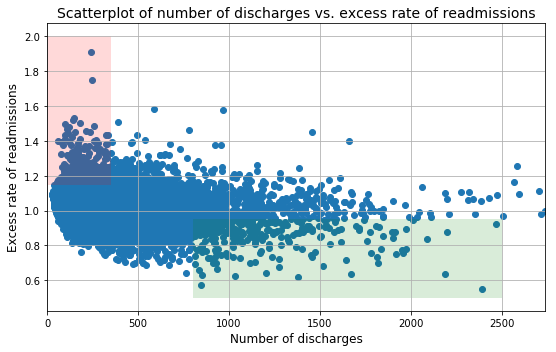

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## My Analysis


<h2>1. Do you agree with the above analysis and recommendations? Why or why not?</h2>

<p> I agree with initial observation of the preliminary report. The scatter plot of the number of discharges versus excess readmission rate does a nice visualization of its trending down with increasing number of discharges</p>
<p> However, I could not agree with the statistical analysis and how the conclusion and recommendations were drawn in the prelimanary study. The statistis drew conclusion merely on the means and frequencies. It is missing a clear null hypothesis, test statistics, p-value and statistical reasonings. The analysis also only looks at one aspect of the picture while in fact more elements could be involved in this issue. </p>




<h2>2. Provide support for your arguments and your own recommendations with a statistically sound analysis:</h2>

The null and alternate hypotheses:

$$H_0: r = 0$$  
The null hypothesis is the number of discharges of a hospital has nothing to do with the excess readmission rate (Pearson correlation = 0). 

$$H_A: r \ne 0 $$
The alternative hypothesis is the number of discharges of a hospital is correlated with the excess readmission rate (Pearson correlation $\ne$ 0). 




In [6]:
#statistical calculation of the Pearson correlation coefficient. 

df = clean_hospital_read_df.drop('Footnote',axis=1).dropna(axis=0, how='any')[['Number of Discharges', 'Excess Readmission Ratio']]
n_dis = df['Number of Discharges'].iloc[:-3]
r_r = df['Excess Readmission Ratio'].iloc[:-3]
pear_r, p_value = stats.pearsonr(n_dis, r_r)
print('Pearson coefficient is:', pear_r)
print('p value is:', p_value)

Pearson coefficient is: -0.0930955428759
p value is: 1.50227564265e-23


In [7]:
#bootstrapping calculation of the Pearson correlation coefficient. 

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(n_dis,r_r)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    n_dis_permuted = np.random.permutation(n_dis)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(n_dis_permuted, r_r)

# Compute p-value: p
p = np.sum(perm_replicates<r_obs) / len(perm_replicates)

print('Pearson coefficient is:', r_obs)
print('p value is:', p)

Pearson coefficient is: -0.0930955428759
p value is: 0.0



### Hypothesis test.

<p>Both frequenist and bootstrapping methods of statistical analysis give p value smaller than the significant level ($\alpha =0.01$).</p>
$$p < \alpha $$
<p>The null hypothesis is rejected. There is a statistically significant correlation between the hospital number of discharges and the excess readmission rate.</p>
<p>The sign of the Pearson correlation coefficient is minus. It gives us some insight that the rate of readmissions is trending down with increasing number of discharges .</p>

### Discuss statistical significance and practical significance. 

<p>We have concluded the statiscal significance for the hypothesis test. But look at the actual value of the Pearson correlation coefficent: -0.093. We know the coefficient means little correlation when it is zero and perfect correlation when it is +1 or -1. The fact that our coefficent is so close to zero indicated that the correlation might not be practically significant. </p>

<p>This changes the recommendations to the client. The recommendations in the prelimanary report to consolidate smaller hospitals do not have a practically significant evident to back it up. There are needs and practical reasons to have smaller medical facilities. It would not be wise to suggest consolidation based on the current study.  </p>

### Look at the scatterplot in the preliminary report.
Advantage of the scatterplot: easy way to visualize two numerical columns. The color strips help readers focus on mentioned areas.
Disadvantage of the scatterplot: too many data points in some areas. It does not show the trend clearly.  

I used a line plot with a regression line plotted in the same figure. It conveys the same message but in a clear way. It also indicates the possible regression line to fit the data. 


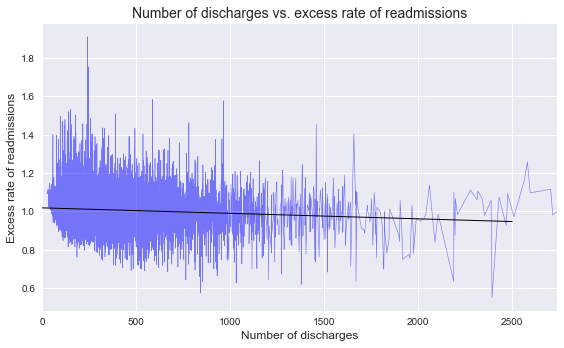

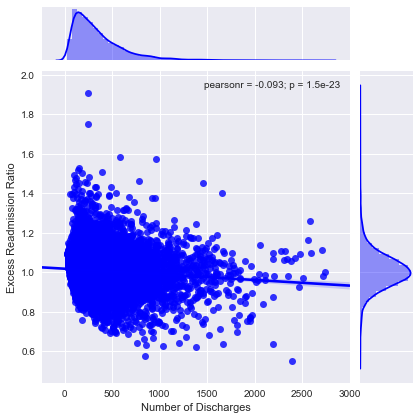

In [29]:

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(n_dis, r_r, color='blue', alpha=0.5, linewidth=0.6)
sns.jointplot(n_dis, r_r, kind='reg', color = 'blue')

slope, intercept =np.polyfit(n_dis, r_r, 1)

x_1 = np.array([0,2500])
y_1 = x_1*slope+intercept

ax.plot(x_1, y_1, color='black', linewidth=1)


ax.set_xlim([0, max(n_dis)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()